In [121]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import xarray as xr

In [2]:
os.chdir('../data/anuario_aforos')

In [3]:
folders = [item for item in os.listdir() if os.path.isdir(item)]

### Estaciones

nº total de estaciones:		1476
nº de estaciones en servicio:	928


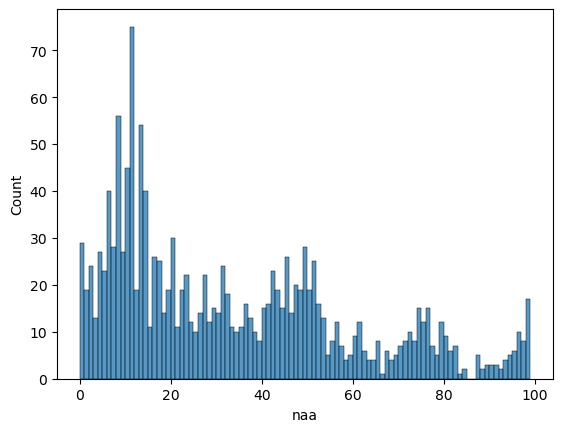

In [30]:
file = 'estaf.csv'

stations = pd.DataFrame()
for folder in folders:
    df = pd.read_csv(f'{folder}/{file}', sep=';', index_col='indroea', encoding='latin1')
    df['demarcacion'] = folder
    stations = pd.concat((stations, df), axis=0)

# eliminar columnas vacías
stations.dropna(axis=1, how='all', inplace=True)
    
print('nº total de estaciones:\t\t{0}'.format(stations.shape[0]))
print('nº de estaciones en servicio:\t{0}'.format(stations.loc[stations.serv == 1].shape[0]))

sns.histplot(stations.naa, binwidth=1);

# exportar todas las estaciones juntas
stations.to_csv(file, sep=',')

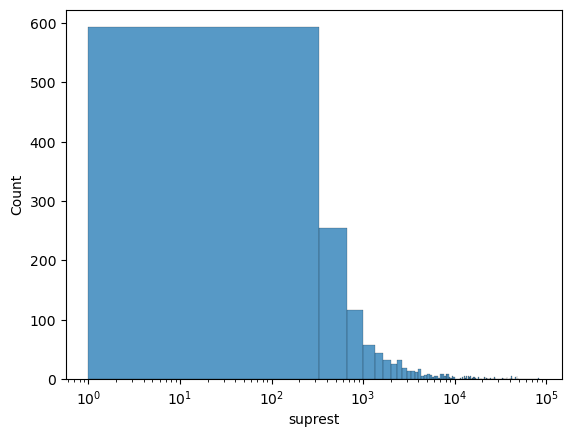

In [31]:
sns.histplot(stations.suprest);
plt.xscale('log')

### Embalses

In [33]:
file = 'embalse.csv'

reservoirs = pd.DataFrame()
for folder in folders:
    df = pd.read_csv(f'{folder}/{file}', sep=';', index_col='ref_ceh', encoding='latin1')
    df['demarcacion'] = folder
    reservoirs = pd.concat((reservoirs, df), axis=0)

# eliminar columnas vacías
reservoirs.dropna(axis=1, how='all', inplace=True)
    
print('nº total de embalses:\t\t{0}'.format(reservoirs.shape[0]))
print('nº de embalses en servicio:\t{0}'.format(reservoirs.loc[reservoirs.serv == 1].shape[0]))

# exportar todas las estaciones juntas
reservoirs.to_csv(file, sep=',')

nº total de embalses:		394
nº de embalses en servicio:	363


### Caudal

In [130]:
start = '1979-01-01'

file = 'afliq.csv'

In [135]:
folder

'CANTABRICO'

In [145]:
for folder in folders:
    # cargar series temporales
    data = pd.read_csv(f'{folder}/{file}', sep=';', index_col='indroea')
    data.fecha = pd.to_datetime(data.fecha, dayfirst=True)
    
    # recortar a la fecha de estudio
    data = data.loc[data.fecha >= start,:]
    
    # reformatear series de caudal y nivel
    Q = pd.DataFrame(index=pd.date_range(data.fecha.min(), data.fecha.max(), freq='1d'), columns=data.index.unique(), dtype=float) 
    N = Q.copy()
    for stn in Q.columns:
        data_stn = data.loc[stn].set_index('fecha', drop=True)
        Q[stn] = data_stn.caudal
        N[stn] = data_stn.altura
    
    # convertir nombre de las columnas en texto
    Q.columns = [str(col) for col in Q.columns]
    N.columns = Q.columns
    
    # eliminar estaciones sin ningún dato
    Q.dropna(axis=1, how='all', inplace=True)
    N.dropna(axis=1, how='all', inplace=True)
    
    # exportar series con formato parquet
    Q.to_parquet(f'{folder}/caudal.parquet', index=True)
    N.to_parquet(f'{folder}/nivel.parquet', index=True)
    
    print('{0} estaciones con series de caudal en el {1}'.format(Q.shape[1], folder.capitalize()))

69 estaciones con series de caudal en el Cantabrico
201 estaciones con series de caudal en el Duero
264 estaciones con series de caudal en el Ebro
50 estaciones con series de caudal en el Galicia_costa
100 estaciones con series de caudal en el Guadalquivir
112 estaciones con series de caudal en el Guadiana
61 estaciones con series de caudal en el Jucar
66 estaciones con series de caudal en el Minho
55 estaciones con series de caudal en el Segura
183 estaciones con series de caudal en el Tajo


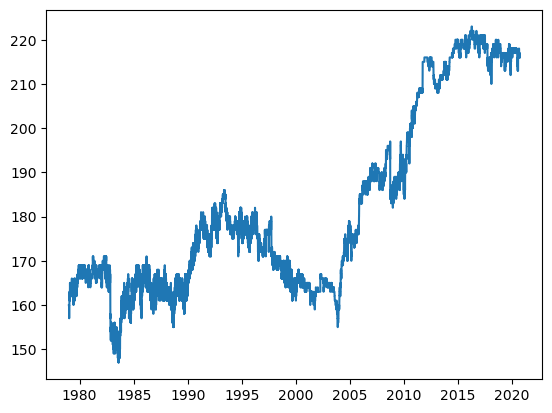

In [88]:
plt.plot(Q.shape[1] - Q.loc['1979-01-01':].isnull().sum(axis=1))

In [79]:
Q.plot()

<AxesSubplot:>

Error in callback <function flush_figures at 0x000001C4F6FDC160> (for post_execute):


KeyboardInterrupt: 